# Submission details
Student name: Kelsey Maina

Student class: Part time

Instructor name: Asha Deen/ Lucille Kaleha

# BUSINESS UNDERSTANDING.

## 1.1 Overview
The core of modern communication is built of telecommunications businesses, which offer a variety of services like phone, data, internet, and video communication. As there is more digitalized development in the society, longevity in tech infrastructure is essential for smooth communication and economic stability. There are, however, major challenges in the telecommunications industry that require strategic solutions. One of the major issues is `customer churn`, where customers stop using a product or switch from one service provider to another. High churn rates impact revenue and customer satisfaction. A way to reduce churn is by enhancing customer service by, for example; improving service quality and personalizing services through data analytics. The metric of success of the model should be an accuracy score of 80%. In conclusion, Telecommunications firms can thrive in this developing setting by embracing innovation, making wise investments, and maintaining a high priority on customer satisfaction.

## 1.2 Problem Statement
I have been tasked by SyriaTel, a telecommunications company, to identify patterns and factors that will enable them to anticipate customer behavior and take proactive steps to reduce churn rates. For this analysis, I'm leveraging data from the SyriaTel dataset that contains data on customers' usage patters and services information. As a result of the predictive analysis, the firm will be able to retain their clients. Overall, SyriaTel is looking to obtain predictive machine learning models that can predict whether customers are likely to churn or not.

## 1.3 Objectives
1.	To build machine learning models that will predict how likely a customer will churn by analyzing customer features.

2.  To identify the specific features that influence the rate of customer churn.

3.  To determine the most accurate model in predicting the classification of churn/non-churn customers.

  

# DATA UNDERSTANDING.
This project analysis uses previous customer data from SyriaTel telecommunications company, which contains customer and service information. 

The dataset is in CSV format downloaded from this source; https://www.kaggle.com/becksddf/churn-in-telecoms-dataset


In [7]:
# view the dataset
# read the csv file

import pandas as pd

telecom_df= pd.read_csv("bigml_59c28831336c6604c800002a.csv")
telecom_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


The dataset contains 3333 rows and 21 columns which include: 
- `demographic data` like state, area code 

- `customer usage patterns` like total day calls, total day minutes

- `service information` like total day charge

The column titles are as follows:

- State: The state where the customer resides.

- Account length: The number of days that this account has been active.

- Area code: The area code associated with the customer's phone number.

- Phone number: The customer's phone number.

- International plan: A binary variable indicating whether the customer has an international calling plan (1) or not (0).

- Voice mail plan: A binary variable indicating whether the customer has a voicemail plan (1) or not (0).

- Number vmail messages: The number of voicemail messages the customer has.

- Total day minutes: The total number of minutes the customer used during the daytime.

- Total day calls: The total number of calls the customer made or received during the daytime.

- Total day charge: The total charges incurred by the customer for daytime usage.

- Total eve minutes: The total number of minutes the customer used during the evening.

- Total eve calls: The total number of calls the customer made or received during the evening.

- Total eve charge: The total charges incurred by the customer for evening usage.

- Total night minutes: The total number of minutes the customer used during the night.

- Total night calls: The total number of calls the customer made or received during the night.

- Total night charge: The total charges incurred by the customer for night usage.

- Total intl minutes: The total number of minutes the customer used for international calls.

- Total intl calls: The total number of international calls the customer made.

- Total intl charge: The total charges incurred by the customer for international calls.

- Customer service calls: The number of customer service calls made by the customer.

- Churn: A binary variable indicating whether the customer has churned (1) or not (0).


# DATA CLEANING.

In [33]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve,classification_report
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN

#import warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
#view the first 5 rows of the dataset
telecom_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# get information on the dataset
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The data types of the columns indicate that most features are represented as integers or floats, while a few are categorical variables (object), such as 'state', 'international plan', and 'voice mail plan'. The 'churn' column is a boolean variable, representing whether a customer has churned (True) or not (False).

In [13]:
telecom_df.shape

(3333, 21)

The shape of the dataset is 3333 rows and 21 columns(features)

In [15]:
#statistical information on the dataset
telecom_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [16]:
#check for missing values
telecom_df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

From the above, it clear that there are no missing values thus the dataset contains no null values and is complete.

In [22]:
#check for duplicates
telecom_df.duplicated().value_counts()

False    3333
Name: count, dtype: int64

The dataset contains no duplicates.

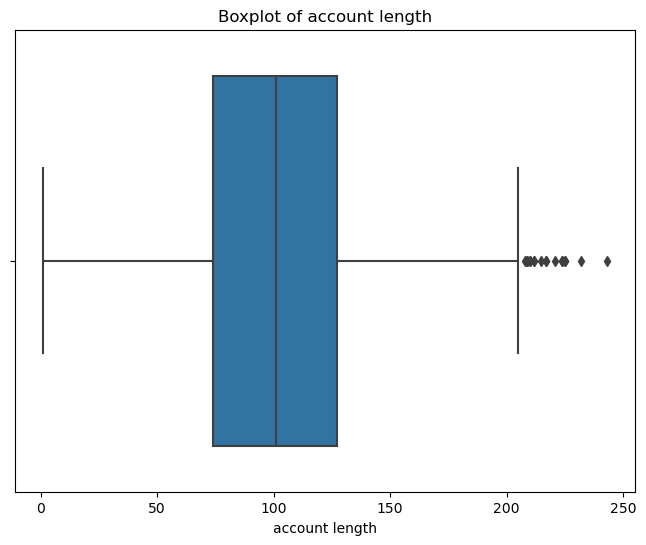

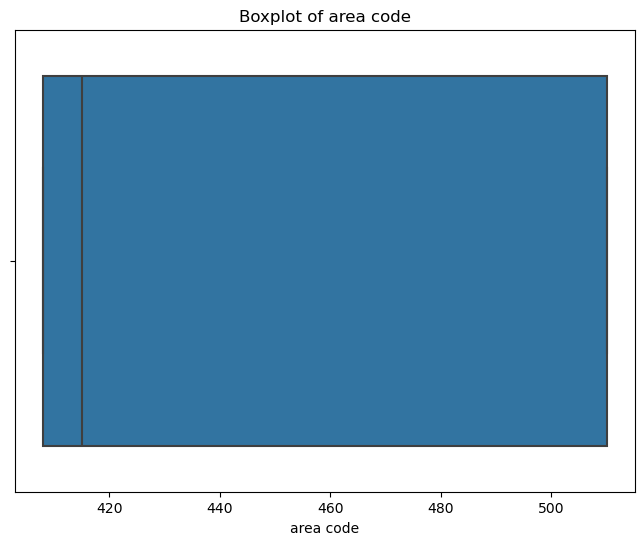

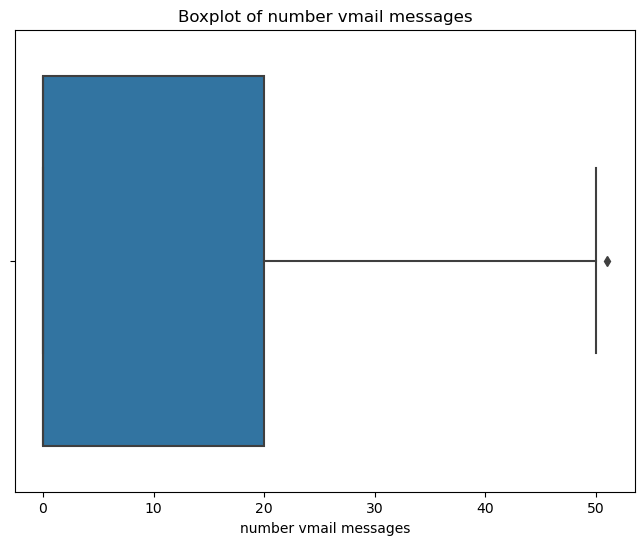

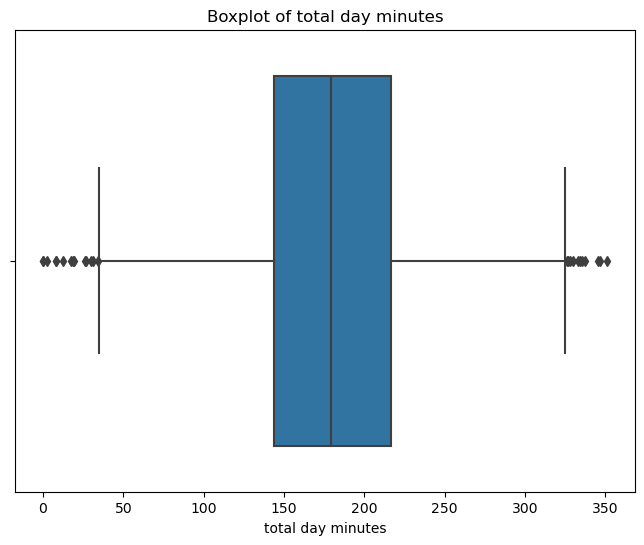

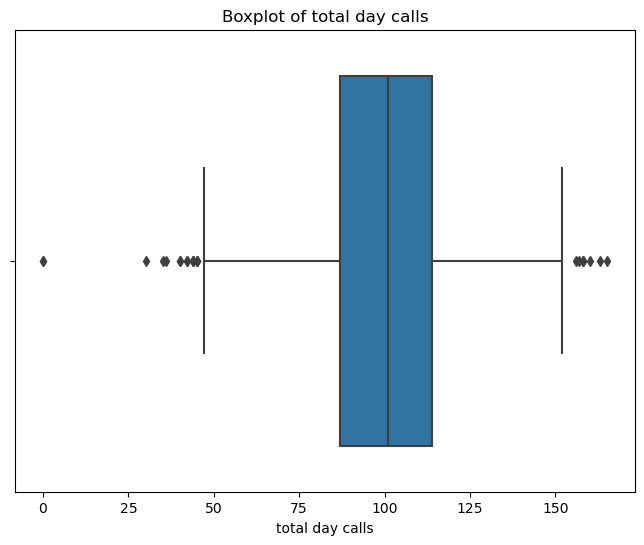

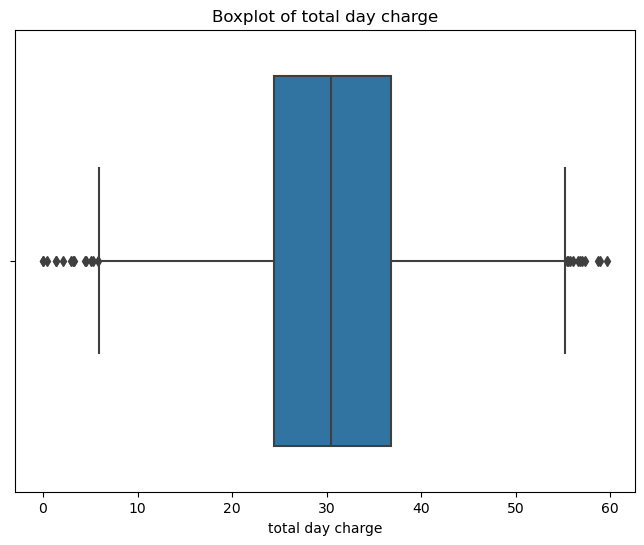

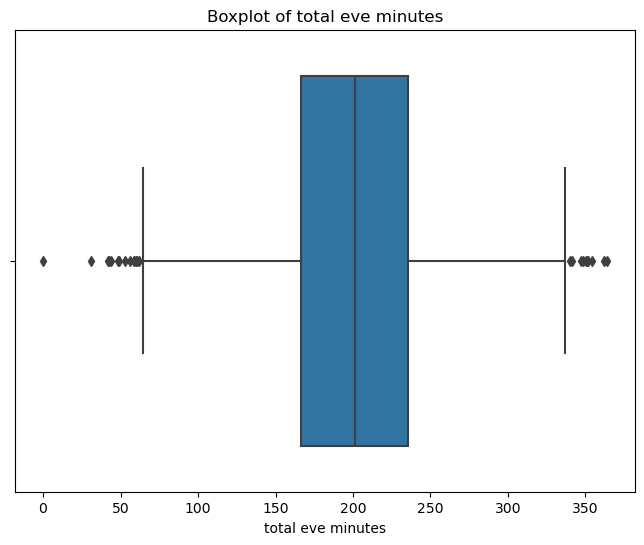

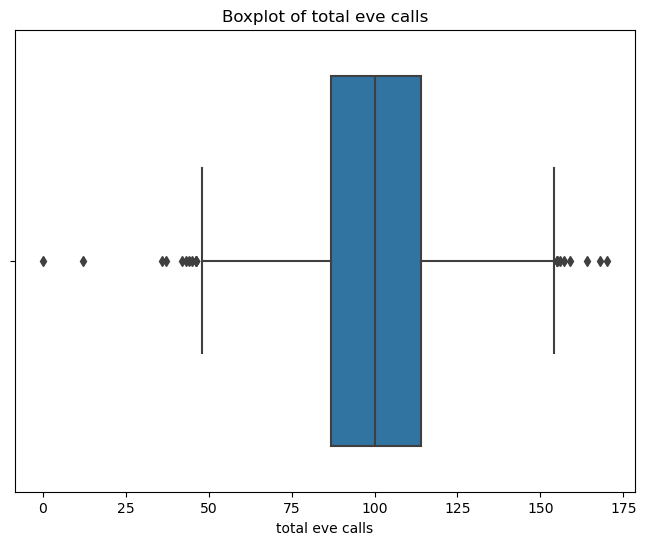

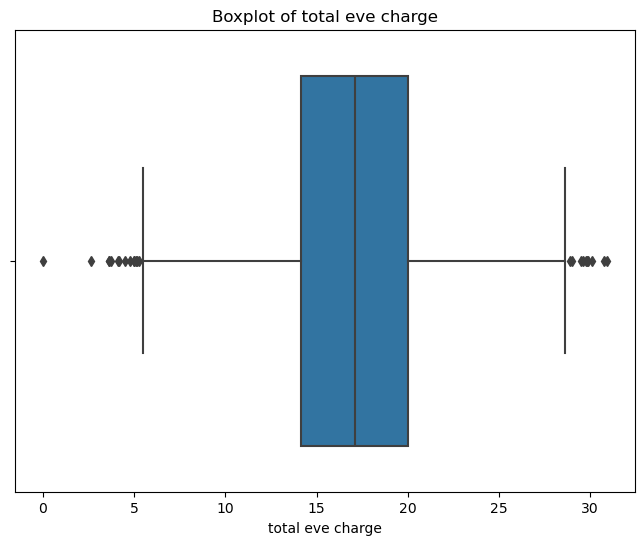

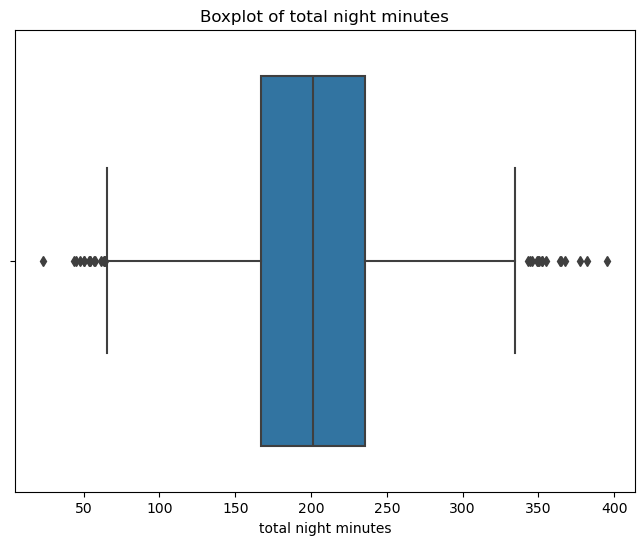

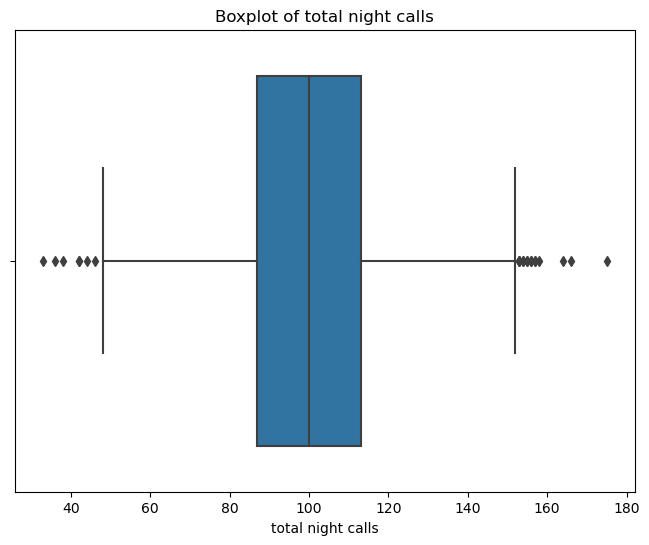

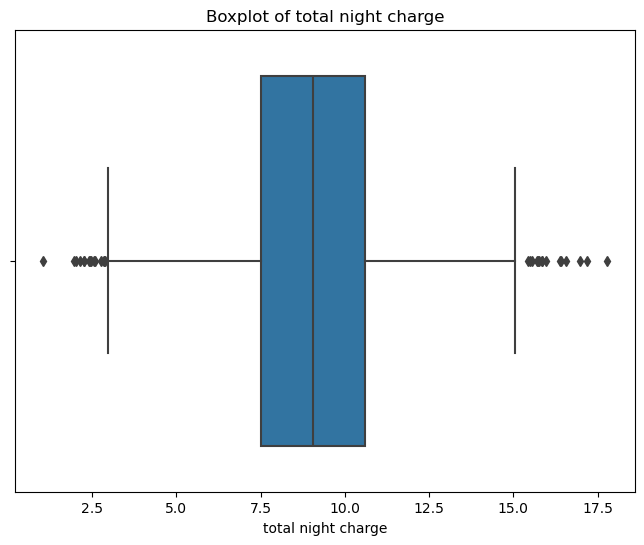

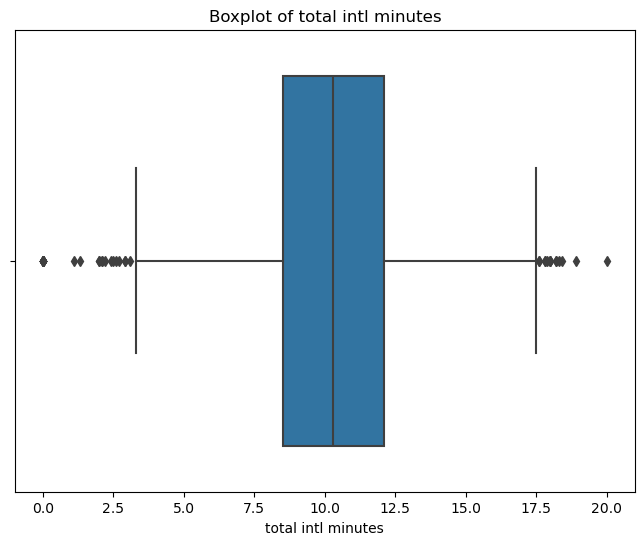

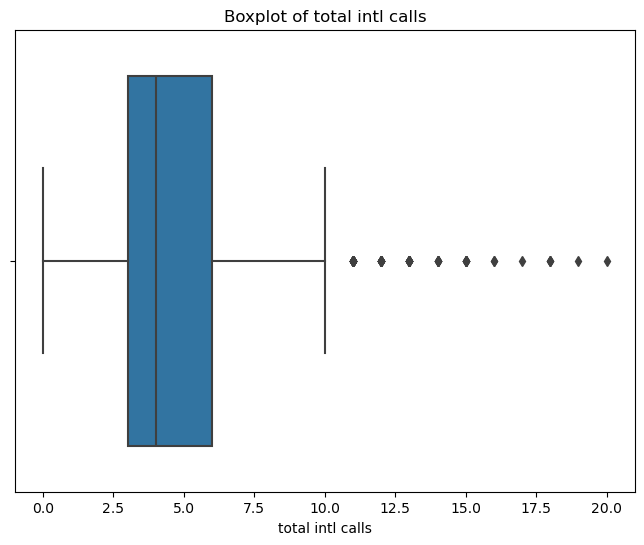

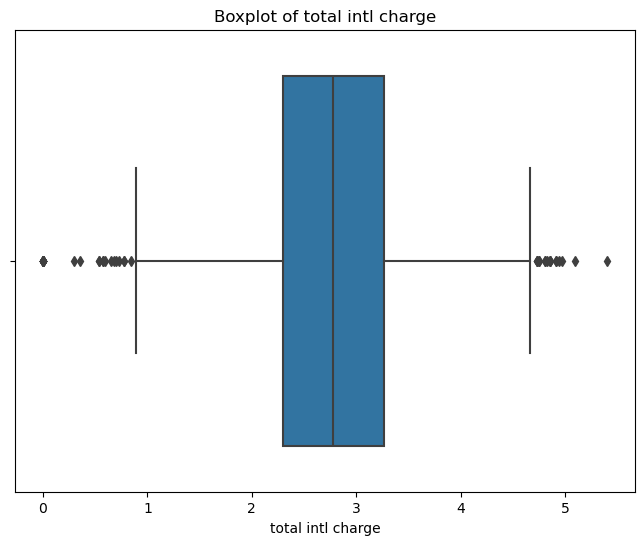

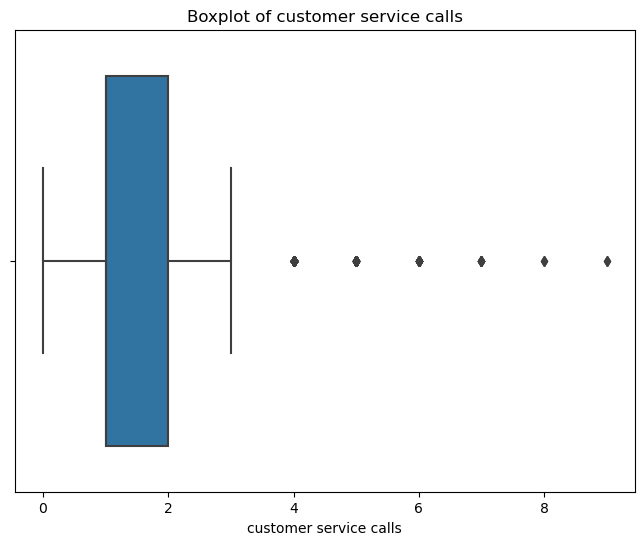

In [26]:
#check for outliers
numeric_columns = telecom_df.select_dtypes(include = 'number').columns

#plot boxplots for each numeric feature
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x = telecom_df[column])
    plt.xlabel(column)
    plt.title(f'Boxplot of {column}')
    plt.show()

# DATA ANALYSIS.

### 1.1 UNIVARIATE ANALYSIS;

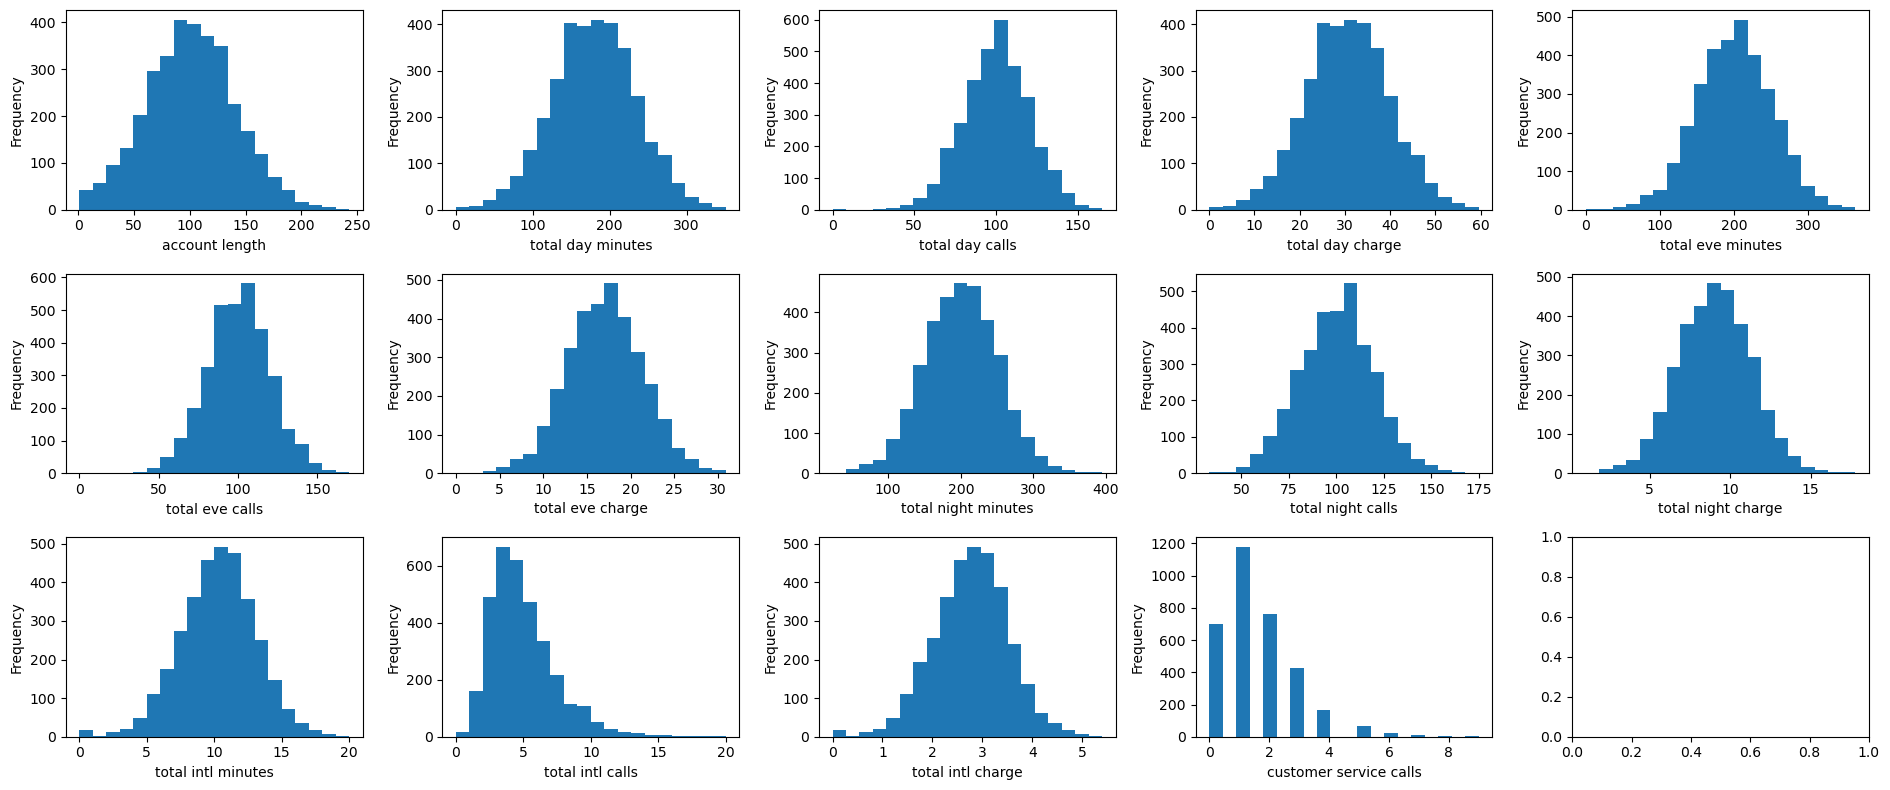

In [27]:
#plot the distribution of each feature
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(19, 8))
variables = ['account length', 'total day minutes', 'total day calls', 'total day charge',
             'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
             'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
             'total intl charge', 'customer service calls']

for i, variable in enumerate(variables):
    ax = axes[i // 5, i % 5]
    ax.hist(telecom_df[variable], bins=20)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Most of the features are normally distributed except for `total intl calls` and `customer service calls` which are left skewed.